###  Estimating "Compressive Strength of Concrete" by "Nonlinear Regression"

Raw Data Resource:
https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls

##### Dataframe is composed of 9 scalar columns:
1. Cement (Kg/m3)
2. Blast Furnace Slag (aka BFS) (Kg/m3)
3. Fly Ash (Kg/m3)
4. Water  (Kg/m3) 
5. Super Plasticizer (aka SP) (Kg/m3)
6. Coarse Aggregate (Kg/m3)
7. Fine Aggregate (Kg.m3)
8. Age (days) 
9. Concrete Compressive Strength (aka Strength) (MPa) 
    
##### Purpose of Project:
Making an Estimator to predict the values of column 9:  **"Concrete Compressive Strength (MPa)"**


In [1]:
# importing necessary packages and modules

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor 
import random
from sklearn.utils import resample

from sklearn.decomposition import PCA
import matplotlib.colors as colors


In [2]:
# importing data

df_raw = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls',header=0)
df_raw.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
# simplifying the header
df_raw.columns = ['Cement', 'BFS', 'FlyAsh', 'Water', 'SP', 'CoarseAgg', 'FineAgg', 'Age', 'Strength']
df_raw.head()

,Cement,BFS,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [4]:
# removing unnecessary columns

# define a function called remove_extra_columns
# to delete the unnecessary columns (eg. ID)

def remove_extra_columns( df, del_columns ):
    keep_columns = []
    for c in df.columns:
        if c not in del_columns:
            keep_columns.append(c)
    return df.loc[ : , keep_columns ]

# removing
del_columns = [  ] 
df_raw = remove_extra_columns( df_raw, del_columns )    
df_raw.head() 

,Cement,BFS,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
# dividing columns into scalar_columns & categorical_columns
# specifying the estimated column
 
scalar_columns      = ['Cement','BFS','FlyAsh','Water','SP','CoarseAgg','FineAgg','Age','Strength']
categorical_columns = [ ]

estimated_column    = 'Strength'


### Removing Whitespaces!
After reading data from a file, strings might contain white spaces (eg: 
' hi ') which should be removed.

In [6]:
# define a function called remove_whitespaces
# to remove whitespaces from begining/end of strings

def remove_whitespaces( df, cols ):
    n = df.shape[0]
    for c in cols:
        s=[]
        for i in range(0,n):
            s.append( df.loc[i,c].strip() )
        df.loc[:,c] = s
    return df

df_raw = remove_whitespaces( df_raw, categorical_columns )

for c in categorical_columns:
    print('\n', c, '\n', sorted(df_raw.loc[:,c].unique()))

In [7]:
# sorting order of columns:
# scalar first, categorical second 

df_raw = df_raw.loc[ :, scalar_columns+categorical_columns ]
df_raw.head()

,Cement,BFS,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#               Checking for missing values               # 
#                    ( Scalar Columns )                   #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [9]:
df_with_missing = df_raw.copy()
df_with_missing[ scalar_columns ].head() 

,Cement,BFS,FlyAsh,Water,SP,CoarseAgg,FineAgg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [10]:
df_with_missing.shape

(1030, 9)

In [11]:
# Checking for blank cells
df_with_missing[ scalar_columns ].count()

Cement       1030
BFS          1030
FlyAsh       1030
Water        1030
SP           1030
CoarseAgg    1030
FineAgg      1030
Age          1030
Strength     1030
dtype: int64

In [12]:
# Checking type: object means missing value
df_with_missing[ scalar_columns ].dtypes

Cement       float64
BFS          float64
FlyAsh       float64
Water        float64
SP           float64
CoarseAgg    float64
FineAgg      float64
Age            int64
Strength     float64
dtype: object

In [74]:
# checking unique values & additivity of values
for c in scalar_columns:
     print( '\n', c, sorted(df_with_missing[c].unique(), reverse=True )  )
     print( 'sum =', sum(df_with_missing[c].unique()) )


 Cement [540.0, 531.3, 528.0, 525.0, 522.0, 520.0, 516.0, 505.0, 500.1, 500.0, 491.0, 485.0, 480.0, 475.0, 469.0, 451.0, 450.1, 446.0, 439.0, 436.0, 427.5, 425.0, 424.0, 405.0, 401.8, 400.0, 397.0, 393.0, 389.9, 388.6, 387.0, 385.0, 382.5, 382.0, 381.4, 380.0, 379.5, 376.0, 375.0, 374.3, 374.0, 366.0, 362.6, 359.0, 356.0, 355.9, 355.0, 350.0, 349.0, 342.0, 339.2, 339.0, 337.9, 336.5, 336.0, 334.0, 333.0, 332.5, 331.0, 330.5, 326.5, 326.0, 325.6, 325.0, 323.7, 322.5, 322.2, 322.0, 321.4, 321.3, 321.0, 318.8, 318.0, 317.9, 316.1, 315.0, 314.0, 313.8, 313.3, 313.0, 312.9, 312.7, 310.0, 309.9, 307.0, 305.3, 305.0, 304.8, 304.0, 303.6, 302.0, 300.0, 299.8, 298.2, 298.1, 298.0, 297.8, 297.16, 297.0, 296.0, 295.8, 295.71, 295.0, 290.35, 290.2, 289.0, 288.4, 288.0, 287.3, 287.0, 286.3, 285.0, 284.0, 281.0, 280.0, 279.8, 277.19, 277.05, 277.0, 276.4, 276.0, 275.07, 275.0, 273.0, 272.8, 272.6, 266.2, 266.0, 265.0, 264.5, 262.0, 261.9, 261.0, 260.9, 260.0, 259.9, 255.5, 255.3, 255.0, 254.0, 252.

In [14]:
scalar_columns_with_missing_values = []

In [15]:
# define a function called Correct_Missing_Scalar
# which returns corrected df

def Correct_Missing_Scalar( df, ft ):
    
    x   = df[ft].copy()
    val = []
    
    for r in range( 0, len(x) ):
        if x[r] not in ['?'] :
            val.append( float(x[r]) ) 
            
    med = stat.median(val)
    
    for r in range( 0, len(x) ):
        if x[r] in ['?'] :
            x[r] = float(med)
        else:
            x[r] = float(x[r])
            
    return x.astype('int64') 

In [16]:
# correcting scalar columns
for ft in scalar_columns_with_missing_values: 
    df_with_missing[ft] = Correct_Missing_Scalar( df_with_missing, ft )
  
print( df_with_missing[ scalar_columns ].head() )

   Cement    BFS  FlyAsh  Water   SP  CoarseAgg  FineAgg  Age   Strength
0   540.0    0.0     0.0  162.0  2.5     1040.0    676.0   28  79.986111
1   540.0    0.0     0.0  162.0  2.5     1055.0    676.0   28  61.887366
2   332.5  142.5     0.0  228.0  0.0      932.0    594.0  270  40.269535
3   332.5  142.5     0.0  228.0  0.0      932.0    594.0  365  41.052780
4   198.6  132.4     0.0  192.0  0.0      978.4    825.5  360  44.296075


In [17]:
# Checking type: object means missing value
df_with_missing[ scalar_columns ].dtypes

Cement       float64
BFS          float64
FlyAsh       float64
Water        float64
SP           float64
CoarseAgg    float64
FineAgg      float64
Age            int64
Strength     float64
dtype: object

In [75]:
# checking unique values & additivity of values
for c in scalar_columns:
     print( '\n', c, sorted(df_with_missing[c].unique(), reverse=True )  )
     print( 'sum =', sum(df_with_missing[c].unique()) )


 Cement [540.0, 531.3, 528.0, 525.0, 522.0, 520.0, 516.0, 505.0, 500.1, 500.0, 491.0, 485.0, 480.0, 475.0, 469.0, 451.0, 450.1, 446.0, 439.0, 436.0, 427.5, 425.0, 424.0, 405.0, 401.8, 400.0, 397.0, 393.0, 389.9, 388.6, 387.0, 385.0, 382.5, 382.0, 381.4, 380.0, 379.5, 376.0, 375.0, 374.3, 374.0, 366.0, 362.6, 359.0, 356.0, 355.9, 355.0, 350.0, 349.0, 342.0, 339.2, 339.0, 337.9, 336.5, 336.0, 334.0, 333.0, 332.5, 331.0, 330.5, 326.5, 326.0, 325.6, 325.0, 323.7, 322.5, 322.2, 322.0, 321.4, 321.3, 321.0, 318.8, 318.0, 317.9, 316.1, 315.0, 314.0, 313.8, 313.3, 313.0, 312.9, 312.7, 310.0, 309.9, 307.0, 305.3, 305.0, 304.8, 304.0, 303.6, 302.0, 300.0, 299.8, 298.2, 298.1, 298.0, 297.8, 297.16, 297.0, 296.0, 295.8, 295.71, 295.0, 290.35, 290.2, 289.0, 288.4, 288.0, 287.3, 287.0, 286.3, 285.0, 284.0, 281.0, 280.0, 279.8, 277.19, 277.05, 277.0, 276.4, 276.0, 275.07, 275.0, 273.0, 272.8, 272.6, 266.2, 266.0, 265.0, 264.5, 262.0, 261.9, 261.0, 260.9, 260.0, 259.9, 255.5, 255.3, 255.0, 254.0, 252.

In [19]:
# scalar columns have no missing values!  passed!

In [20]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#               Checking for missing values               # 
#                 ( Categorical Columns )                 #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [21]:
df_with_missing[ categorical_columns ].head() 

""
0
1
2
3
4


In [22]:
df_with_missing.shape

(1030, 9)

In [23]:
df_with_missing[ categorical_columns ].count()

Series([], dtype: int64)

In [24]:
df_with_missing[ categorical_columns ].dtypes

Series([], dtype: object)

In [25]:
for c in categorical_columns:
    print('\n', c, '\n', sorted(df_raw.loc[:,c].unique()))

In [26]:
categorical_columns_with_missing_values = [  ] 

In [27]:
# define a function called Correct_Categorical_Missing
# which returns corrected df

def Correct_Missing_Categorical( df, ft ): 
    
    x = df.loc[ :, ft ].copy()
    s = []
    for i in range( 0, len(x) ):
        if x[i] not in ['?'] :
            s.append( x[i] ) 
            
    mod = stat.mode(s)
    
    for i in range( 0, len(x) ):
        if x[i] in ['?'] :
            x[i] = mod
        else:
            x[i] = str(x[i]) 
             
    return x.astype('str')

In [28]:
# correcting categorical columns
for ft in categorical_columns_with_missing_values: 
    df_with_missing[ft] = Correct_Missing_Categorical( df_with_missing, ft )
  
print( df_with_missing[ categorical_columns ].head() )

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [29]:
df_with_missing[ categorical_columns ].dtypes

Series([], dtype: object)

In [30]:
for c in categorical_columns:
    print('\n', c, '\n', sorted(df_raw.loc[:,c].unique()))

In [31]:
# categorical columns have no missing values!  passed!
# no missing values are in data =>
df_no_missing = df_with_missing

### Data Cleaning
Typically there is some noise (dirt) in the data which should be cleaned.

##### There are two approaches to clean the data:
1. Statistical Methods, including:
 - Inter Quartile Range (IQR): to detect general univariate outliers
 - z-values: to detect extreme univariate outliers
 - mahalanobis distance test: to detect multivariate outliers


2. Machine-Learning Methods, including:
 - Isolation Forest 
 - Eliptic_envelope
 - Local Outlier Factor
 - One Class SVM 
 

In [32]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                  Visualizing Outliers                   #
#                        by Boxplot                       # 
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

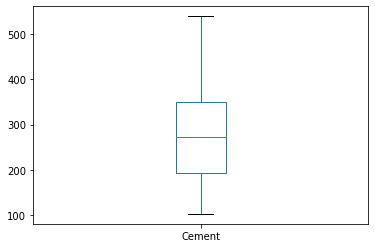

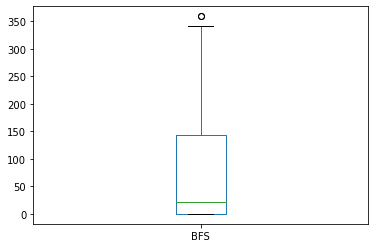

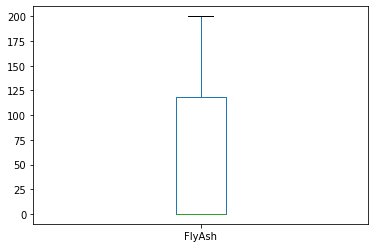

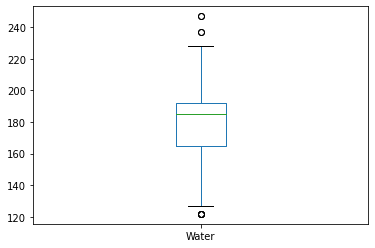

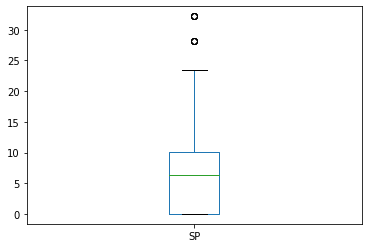

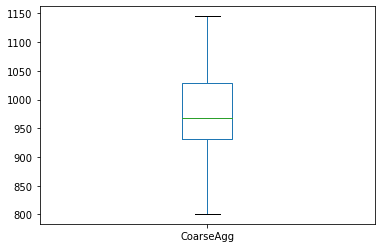

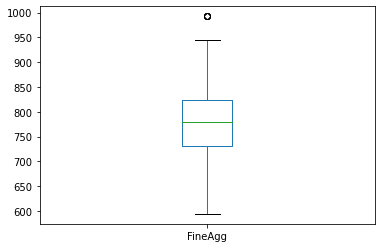

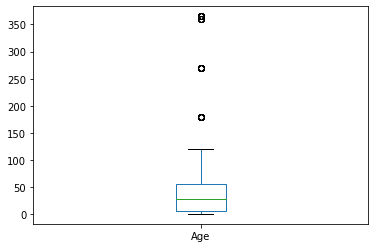

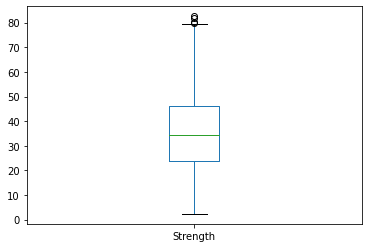

In [33]:
# define a function called "plot_boxplot"

def plot_boxplot(df,ft):   
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()    
    
for c in scalar_columns:
    plot_boxplot( df_no_missing, c )

In [34]:
# defining columns with outliers
cols_with_outliers = [ 'BFS', 'Water', 'SP', 'FineAgg', 'Age', 'Strength' ]

In [35]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#               Removing "Extreme" Outliers               # 
#                     using "z-values"                    #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [36]:
# define a function called outliers
# which returns a list of index of outliers
# z = (x-M) / SD
# +/- 3    

def outliers(df,ft):
    x  = df[ft]
    M  = x.mean()
    SD = x.std()
    z  = (x-M) / SD
    
    upper_bound = +3
    lower_bound = -3
    
    ls = df.index[  (z > upper_bound) 
                  | (z < lower_bound) ]
    
    return ls

In [37]:
# create a function to store the output indices 
# from multiple columns    
    
index_list = []
for feature in cols_with_outliers:  
    index_list.extend( outliers(df_no_missing,feature) )

In [38]:
# define a function called "remove_extreme_outliers_by_zValues"
# which returns a dataframe without extreme outliers 

def remove_extreme_outliers_by_zValues(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 

df_extreme    = df_no_missing.iloc[ sorted(index_list), : ]
df_no_extreme = remove_extreme_outliers_by_zValues( df_no_missing, index_list )
len(df_no_extreme)/len(df_raw) *100

95.24271844660194

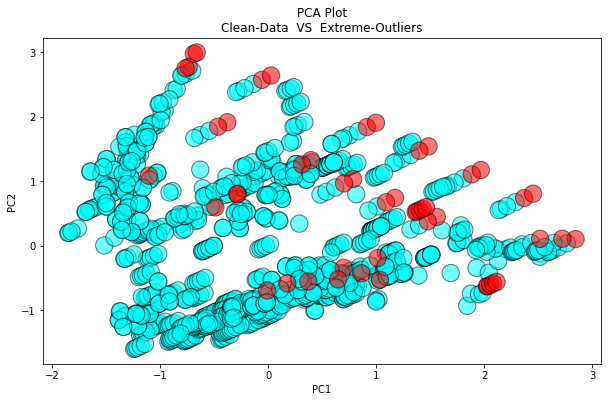

In [39]:
# visualizing extreme outliers
df_dirty = pd.concat([df_no_extreme[scalar_columns],df_extreme[scalar_columns]],axis=0)

flag_clean   = np.ones( df_no_extreme.shape[0] ) * (+1)
flag_outlier = np.ones( df_extreme.shape[0]    ) * (-1) 

flag = list(flag_clean)
for i in list(flag_outlier):
    flag.append(i)

# PCA of Multivariate Outliers
x = df_dirty 
y = []
for i in range(0,len(flag)):
    if flag[i]==1: y.append('cyan')
    else:          y.append('red')

pca = PCA()
pca.fit_transform( x )
 
x_pca = scale( pca.fit_transform( x ) )
x_pc1 = x_pca[:,0] 
x_pc2 = x_pca[:,1] 

# PCA Scatter Plot 
fig, ax = plt.subplots( figsize=(10,6) )  

scatter = ax.scatter( 
      x_pc1
    , x_pc2 
    #, cmap = 'rainbow'
    , c    = y
    , s    = 300
    , edgecolors = 'k'
    , alpha      = 0.55 
    )
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot\nClean-Data  VS  Extreme-Outliers')

'''
legend = ax.legend( scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc='upper right') 
'''

plt.show()

In [40]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#            Removing "Multivariate" Outliers             # 
#              using "Mahalanobis Distance"               #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [41]:
# define a function called "MahalanobisDist"
# which returns the Mahalanobis Distance (MD) for each record

def MahalanobisDist(df, verbose=False):
    covariance_matrix = np.cov(df, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(df.shape[0]):
                vars_mean.append(list(df.mean(axis=0)))
            diff = df - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                print("Covariance Matrix:\n {}\n".format(covariance_matrix))
                print("Inverse of Covariance Matrix:\n {}\n".format(inv_covariance_matrix))
                print("Variables Mean Vector:\n {}\n".format(vars_mean))
                print("Variables - Variables Mean Vector:\n {}\n".format(diff))
                print("Mahalanobis Distance:\n {}\n".format(md))
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")

def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

# finding mahalanobis distance for each record
md = MahalanobisDist(df_no_extreme[scalar_columns].to_numpy(), verbose=0)


# defining a function called "multivar_outliers" 
# which returns list of indexes of multivariate outliers 

def multivar_outliers(df,md):
    #df['MD'] = md
    M  = np.mean(md)
    SD = np.std(md)
    threshhold = M + 3.0*SD
    ls = df.index[  (md > threshhold)  ]
    return ls
 
index_list = multivar_outliers( df_no_extreme[scalar_columns], md )


# define a function called "remove"
# which removes multivariate outliers

def remove_multivar_outliers(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 

df_no_multivar = remove_multivar_outliers( df_no_extreme, index_list ) 
df_multivar    = df_no_extreme.drop( df_no_multivar.index ) 
len(df_no_multivar)/len(df_raw) *100

93.68932038834951

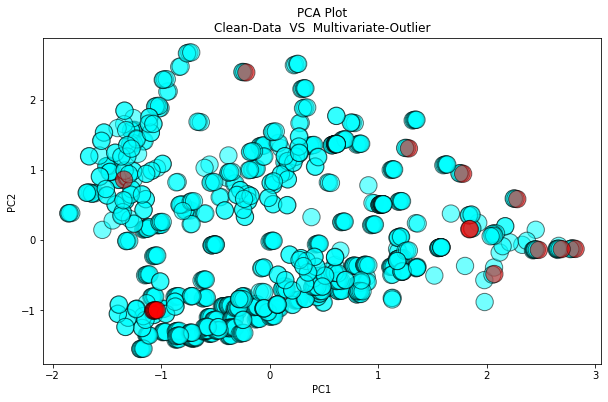

In [42]:
# visualizing multivariate outliers
df_dirty = pd.concat([df_no_multivar[scalar_columns],df_multivar[scalar_columns]],axis=0)

flag_clean   = np.ones( df_no_multivar.shape[0] ) * (+1)
flag_outlier = np.ones( df_multivar.shape[0]    ) * (-1) 

flag = list(flag_clean)
for i in list(flag_outlier):
    flag.append(i)

# PCA of Multivariate Outliers
x = df_dirty 
y = []
for i in range(0,len(flag)):
    if flag[i]==1: y.append('cyan')
    else:          y.append('red')

pca = PCA()
pca.fit_transform( x )
 
x_pca = scale( pca.fit_transform( x ) )
x_pc1 = x_pca[:,0] 
x_pc2 = x_pca[:,1] 

# PCA Scatter Plot 
# Clean VS Multivar
fig, ax = plt.subplots( figsize=(10,6) )  

scatter = ax.scatter( 
      x_pc1
    , x_pc2 
    #, cmap = 'rainbow'
    , c    = y
    , s    = 300
    , edgecolors = 'k'
    , alpha      = 0.55 
    )
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot\nClean-Data  VS  Multivariate-Outlier')

'''
legend = ax.legend( scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc='upper right') 
'''

plt.show()

In [43]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#       Cleaning scalar data using Isolation-Forest       # 
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [44]:
# define a function called Clean_by_IForest
# to clean 'scalar columns' using 'Isolation Forest'

def remove_outliers_by_IForest( df, sc_cols, c ):
    sc_data = df[ sc_cols ].values
    IForest = IsolationForest( contamination=c ) 
    IForest.fit( sc_data )
    flag_clean = IForest.predict( sc_data ) == +1
    return df.loc[ flag_clean, : ]

df_clean = remove_outliers_by_IForest( df_no_multivar, scalar_columns, 0.039 )   # 3.9% contamination considered
df_noise       = df_no_multivar.drop( df_clean.index )   

len(df_clean)/len(df_raw) *100

90.0

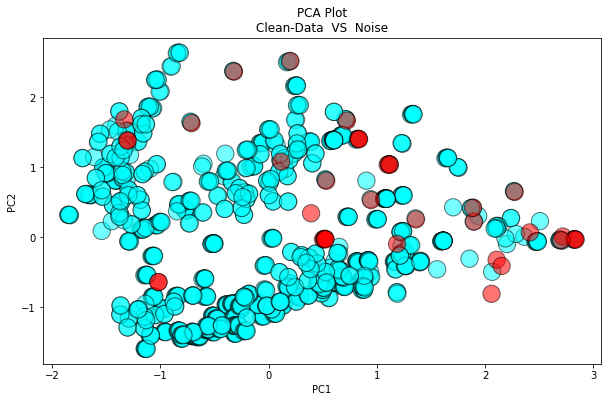

In [45]:
# visualizing multivariate outliers
df_dirty = pd.concat([df_clean[scalar_columns],df_noise[scalar_columns]],axis=0)

flag_clean   = np.ones( df_clean.shape[0] ) * (+1)
flag_outlier = np.ones( df_noise.shape[0] ) * (-1) 

flag = list(flag_clean)
for i in list(flag_outlier):
    flag.append(i)

# PCA of Multivariate Outliers
x = df_dirty 
y = []
for i in range(0,len(flag)):
    if flag[i]==1: y.append('cyan')
    else:          y.append('red')

pca = PCA()
pca.fit_transform( x )
 
x_pca = scale( pca.fit_transform( x ) )
x_pc1 = x_pca[:,0] 
x_pc2 = x_pca[:,1] 

# PCA Scatter Plot 
# Clean VS Multivar
fig, ax = plt.subplots( figsize=(10,6) )  

scatter = ax.scatter( 
      x_pc1
    , x_pc2 
    #, cmap = 'rainbow'
    , c    = y
    , s    = 300
    , edgecolors = 'k'
    , alpha      = 0.55 
    )
 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Plot\nClean-Data  VS  Noise')

'''
legend = ax.legend( scatter.legend_elements()[0],
                    scatter.legend_elements()[1],
                    loc='upper right') 
'''

plt.show()

In [46]:
# Checking Cleaned data at each stage

# Outliers    
Outlier_Dict = { 
      'Method'       : ['z-values', 'Mahalanobis_Distance', 'Isolation Forest']
    , 'Outlier_Type' : ['Extreme' , 'Multivariate'        , 'Noise'           ]
    , 'Clean'        : [ len(df_no_extreme), len(df_no_multivar), len(df_clean) ]
    , 'Outlier'      : [ len(df_extreme),    len(df_multivar),    len(df_noise) ] 
    , 'Clean/No_Missing (%)' : [  len(df_no_extreme)/len(df_no_missing)  *100
                                , len(df_no_multivar)/len(df_no_missing) *100
                                , len(df_clean)/len(df_no_missing)       *100 ] }

Outlier = pd.DataFrame( Outlier_Dict ) 
Outlier 

,Method,Outlier_Type,Clean,Outlier,Clean/No_Missing (%)
0,z-values,Extreme,981,49,95.242718
1,Mahalanobis_Distance,Multivariate,965,16,93.689320
2,Isolation Forest,Noise,927,38,90.000000


In [47]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                Inspecting the Scalar data               # 
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [48]:
# Checking Normality of Distribution of "Estimated Feature"
# by Shapiro-Wilk Test
 
from scipy.stats import shapiro

print('\nShapiro-Wilk Test ...')
stat, p = shapiro( df_clean[ estimated_column ] )

if p>.5: 
    Dist='Normally Distributed.'        # Distribution
    Reg='Linear Regression'             # Regression
else:   
    Dist='NOT Normally Distributed.'    # Distribution
    Reg='Nonlinear Regression'          # Regression
        
print( '\np =', p, 
       '\n=> "' + estimated_column + '" is', Dist, 
       '\n=>  ' + Reg, 'should be used.\n' )
           


Shapiro-Wilk Test ...

p = 9.463707595358528e-11 
=> "Strength" is NOT Normally Distributed. 
=>  Nonlinear Regression should be used.



C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


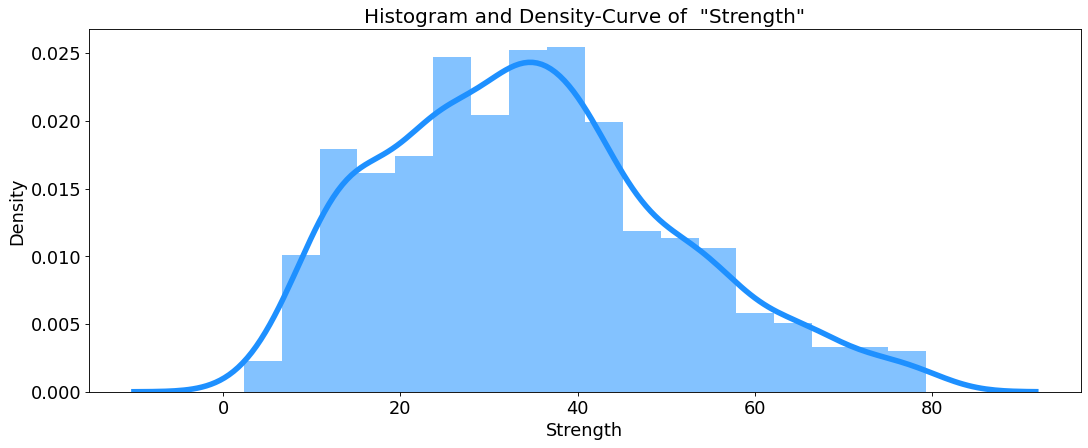

In [49]:
# Histogram & Density Curve
# of Predicted Feature 

import seaborn as sns 

# plot
plt.figure(figsize=(16,6), dpi=80) 
sns.distplot(
        df_clean.loc[ :, estimated_column ]
        , color    =  'dodgerblue' 
        , hist_kws = {'alpha':.55}
        , kde_kws  = {'linewidth':5}
        ) 
 
# Decoration
plt.title('Histogram and Density-Curve of  "' + estimated_column + '"', fontsize=18) 
plt.xlabel( estimated_column,   fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16) 
plt.show() 

## Linearity Assumption
There must be a linear relationship between estimated feature with other scalar features. To Check Linearity, two tools are used:
- Scatter Plot
- Pearson's r Test
    
### Scatter Plots
 - Plotted data must be elliptical. 
 - if the plotted data is curved or cone-shape, nonlinear regression should be used.

### Pearson's r Test
 - result must be significant (P<=.05) 
 - the relationship parameter, r, shouls be notable. Best r is from 0.50 to 1.00
 

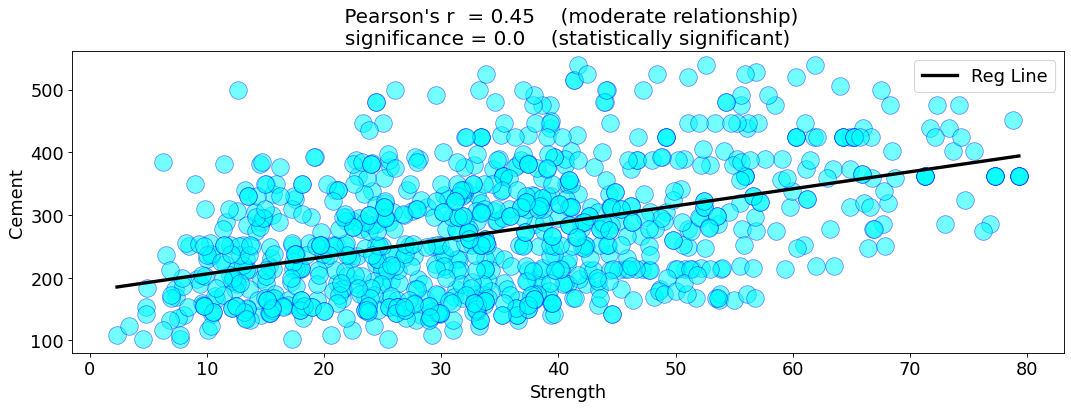

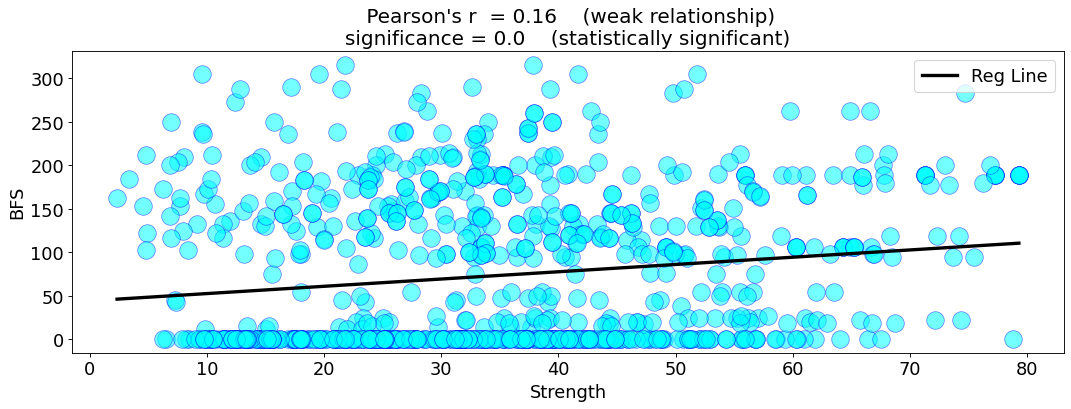

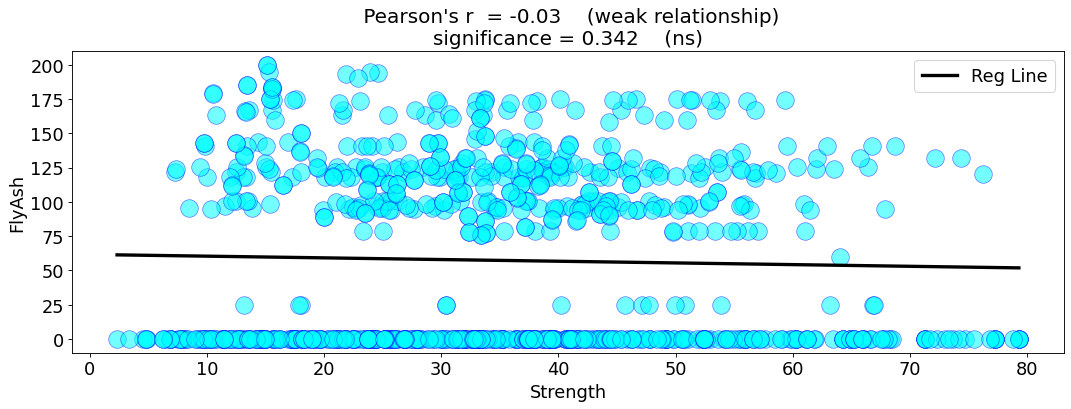

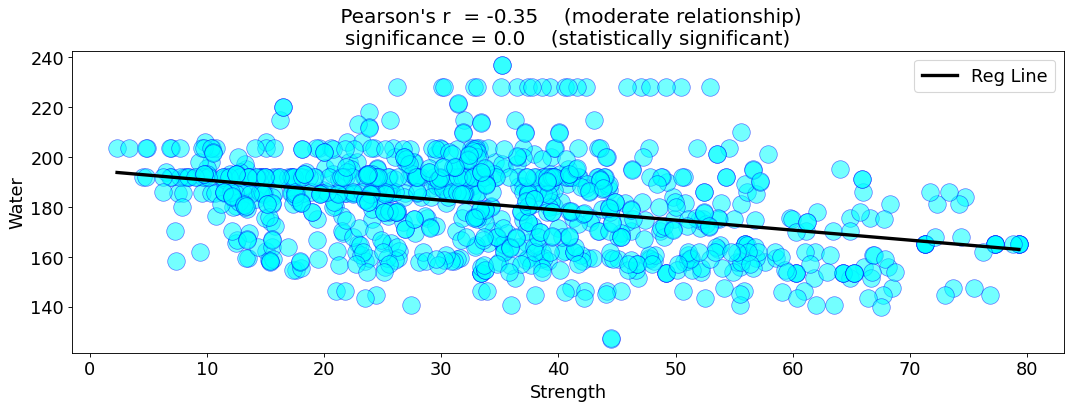

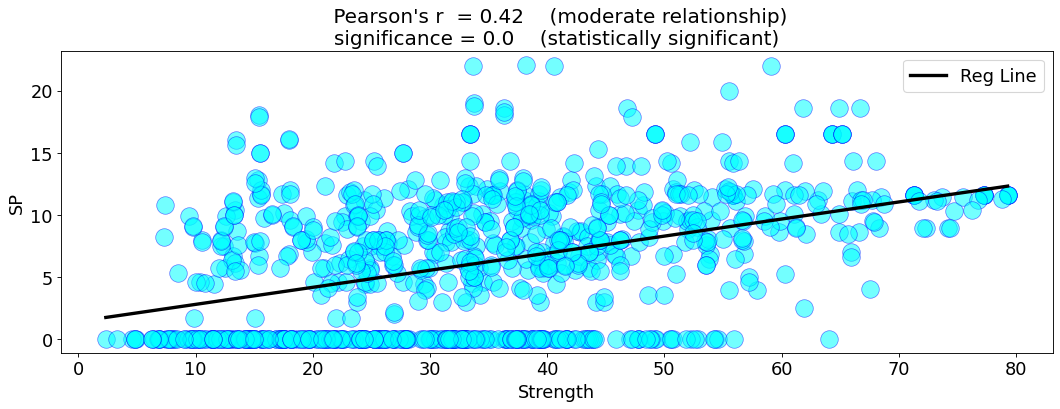

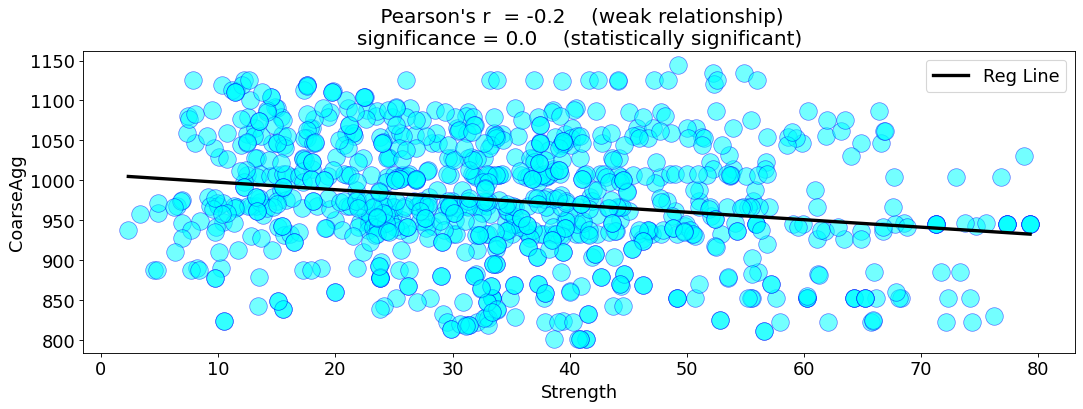

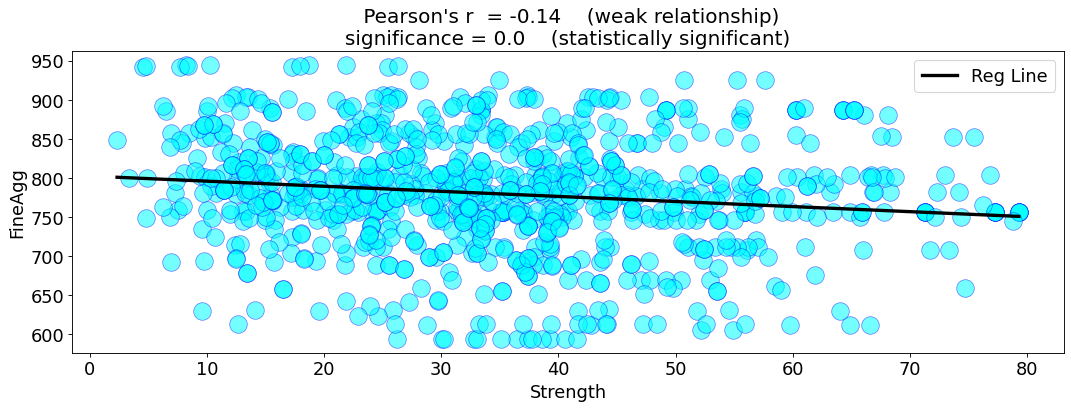

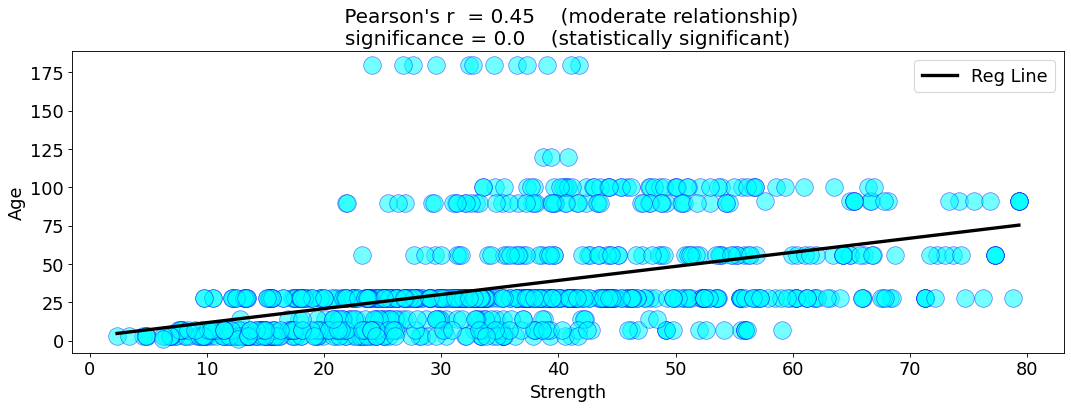

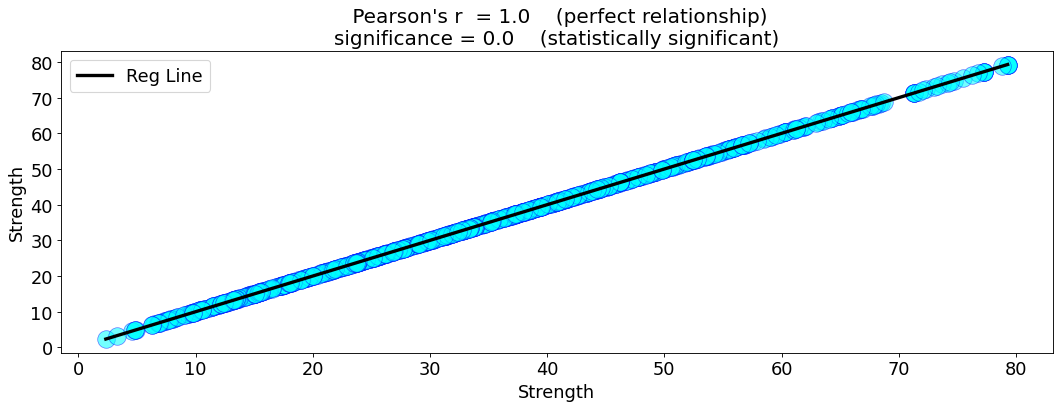

,ft,Pearson_r,Sig,Color
8,Strength,1.000000,0.000000e+00,cyan
7,Age,0.451630,8.753149e-48,cyan
0,Cement,0.448080,5.619821e-47,cyan
4,SP,0.421750,2.823554e-41,cyan
3,Water,0.352793,1.479040e-28,cyan
5,CoarseAgg,0.199964,8.139890e-10,cyan
1,BFS,0.158702,1.196285e-06,cyan
6,FineAgg,0.144886,9.478280e-06,cyan
2,FlyAsh,0.031221,3.423499e-01,red


In [50]:
# Scatter-Plots with Regression-Line & Pearson's r results

# x
x = df_clean[ estimated_column ]
n = len(x)
Zx=sum(x); Mx=Zx/n;  x2=x**2; Zx2=sum(x2);
xReg = [min(x),max(x)]    

R=[]     # empty list of Pearson's r  "r"
P=[]     # empty list of Pearson's r  "p"

for c in scalar_columns:
       
    # y
    y = df_clean[c]      
    Zy=sum(y); My=Zy/n;  xy=x*y;  Zxy=sum(xy); 
    b = (n*Zxy-Zx*Zy)/(n*Zx2-Zx**2)
    a = My - b*Mx
    yReg = a + np.multiply(xReg,b)
      
    # Pearson's r Test  =>  R & P
    from scipy.stats import pearsonr
    r, p  = pearsonr(x,y) 
    R.append(r)
    P.append(p)
    if   abs(r) <  .01: rel='(no relationship)'
    elif abs(r) <  .25: rel='(weak relationship)'
    elif abs(r) <  .50: rel='(moderate relationship)'
    elif abs(r) <  .75: rel='(large relationship)'
    elif abs(r) <= .99: rel='(very large relationship)'
    else              : rel='(perfect relationship)'    
    if    p <= 0.05   : sig='(statistically significant)'
    else              : sig='(ns)'
    
    # Visualizing 
    fig = plt.figure(figsize=(16, 5), dpi= 80)    
    plt.scatter( x,y, s=250, c='cyan', edgecolors='blue', linewidths=0.6, alpha=0.55) 
    plt.plot(xReg, yReg, lw=3, c='k', ls='-', label='Reg Line' ) 
         
    # Decorations 
    plt.title(  " Pearson's r  = " + np.str(round(r,2)) + '    ' + rel
              +"\nsignificance = " + np.str(round(p,3)) + '    ' + sig
              , fontsize=18 )
    plt.xlabel( estimated_column, fontsize=16 )
    plt.ylabel(        c        , fontsize=16 )
    plt.xticks( fontsize=16 )
    plt.yticks( fontsize=16 )
    plt.legend( fontsize=16 )   
    plt.show()

# Pearson_r dataframe   
C=[]
for i in range( 0,len(R) ):
    R[i] = abs(R[i])
    if   (P[i]>.05): C.append('red') 
    else           : C.append('cyan')

Pearson_r_Dict = { 'ft'        : scalar_columns
                 , 'Pearson_r' : R
                 , 'Sig'       : P
                 , 'Color'     : C }

Pearson_r = pd.DataFrame( Pearson_r_Dict )
Pearson_r = Pearson_r.sort_values(['Pearson_r','Sig'], ascending=[False,True])
Pearson_r 

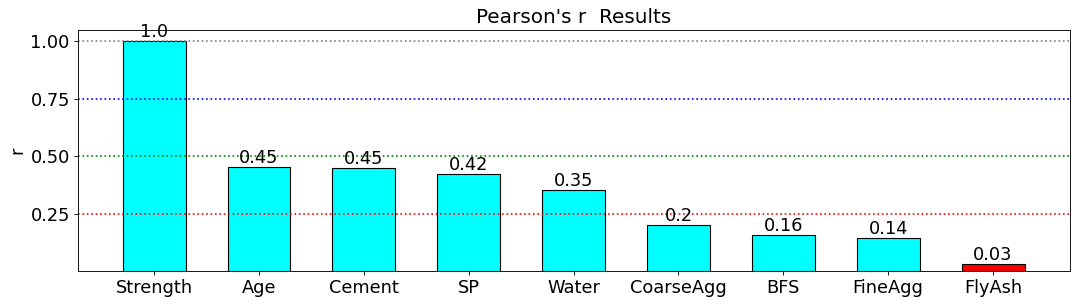

In [51]:
# Visualizing Pearson_r

def Bar_Plot( Pearson_r ):
    
    ft = Pearson_r[ 'ft' ]
    r  = Pearson_r[ 'Pearson_r' ] 
    c  = Pearson_r[ 'Color' ]
    
    fig = plt.figure( figsize=(16, 4), dpi= 80 )   
    
    plt.bar( ft, r, color=c, width=0.6, edgecolor='black' )
    for i, val in enumerate( r.values ):
            plt.text(  i, val, round(float(val),2)
                     , horizontalalignment='center', verticalalignment='bottom'
                     , fontdict={'fontweight':500, 'size':16}
                    ) 
    
    plt.title( "Pearson's r  Results", fontsize=18 )
    #plt.xlabel( "scalar features", fontsize=16 )
    plt.ylabel( "r"   , fontsize=16 )
    plt.xticks(fontsize=16)
    plt.yticks([.25,.50,.75,1.0],fontsize=16)  
    plt.axhline( y=0.25, color='red',   linewidth=1.5, linestyle=':', label='r = 0.25' )
    plt.axhline( y=0.50, color='green', linewidth=1.5, linestyle=':', label='r = 0.50' )
    plt.axhline( y=0.75, color='blue',  linewidth=1.5, linestyle=':', label='r = 0.75' )
    plt.axhline( y=1.00, color='gray',  linewidth=1.5, linestyle=':', label='r = 1.00' )

Bar_Plot( Pearson_r )    

In [52]:
# features with  weak relationship  or  nonsignificant Pearson_r
weakly_related_cols = [ 'FlyAsh' ] 

In [53]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                    Downsampling Data                    #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [54]:
# finding mean of prediction column
mid = df_clean[ estimated_column ].mean()
mid

34.4690249882647

In [55]:
# Using A Category to Downsample
df_High = df_clean[ df_clean[ estimated_column ]>=mid ]  # 432 record
df_Low  = df_clean[ df_clean[ estimated_column ]< mid ]  # 495 record
print( len(df_High), len(df_Low) )

432 495


In [56]:
# down_sampling  (resize to 900)
df_High_downsampled = resample( df_High, replace=False, n_samples=430, random_state=0 )
df_Low_downsampled  = resample( df_Low,  replace=False, n_samples=490, random_state=0 ) 

print(  len( df_High_downsampled )
      , len( df_Low_downsampled  ) 
     )

430 490


In [57]:
# merging down_sampled datasets
df_sample = pd.concat( [  df_High_downsampled
                        , df_Low_downsampled  ] )
len( df_sample )  # 920  

920

In [58]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                   Formatting the Data                   #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [59]:
# step 1:  defining x & y

x = df_sample.drop( estimated_column, axis=1 ).copy()
x = x.drop( weakly_related_cols , axis=1 )

y = df_sample[ estimated_column ].copy() 

In [60]:
# step 2: One-Hot Encoding of categorical data on x

x.dtypes

Cement       float64
BFS          float64
Water        float64
SP           float64
CoarseAgg    float64
FineAgg      float64
Age            int64
dtype: object

In [61]:
categorical_columns

[]

In [ ]:
encode_columns = []
for ft in categorical_columns:
    if ft not in  [estimated_column]:
        encode_columns.append(ft)
        
encode_columns

In [62]:
x_encoded = pd.get_dummies(
      x
    , columns = encode_columns
    )

x_encoded.head()

,Cement,BFS,Water,SP,CoarseAgg,FineAgg,Age
322,249.1,0.0,158.11,12.80,987.76,889.01,56
942,313.3,145.0,178.50,8.00,867.20,824.00,28
127,318.8,212.5,155.70,14.30,852.10,880.40,28
386,528.0,0.0,185.00,6.86,920.00,720.00,28
18,380.0,95.0,228.00,0.00,932.00,594.00,90


In [63]:
# step 3: training and testing sets 

x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y, random_state=0 ,test_size=( 20/len(df_sample) ) 
    )  

In [64]:
# step 4: scaling x
x_train_scaled = scale( x_train )
x_test_scaled  = scale( x_test  ) 

In [65]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#                   defining Regressors                   #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [66]:
# Linear Regressor
Linear_reg   = LinearRegression() 

# Non_Linear Regressors
Hubert_reg   = HuberRegressor()
RANSACR_reg  = RANSACRegressor() 
TheilSen_reg = TheilSenRegressor()

In [67]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#           fitting, finding rmse & Visualizing           #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

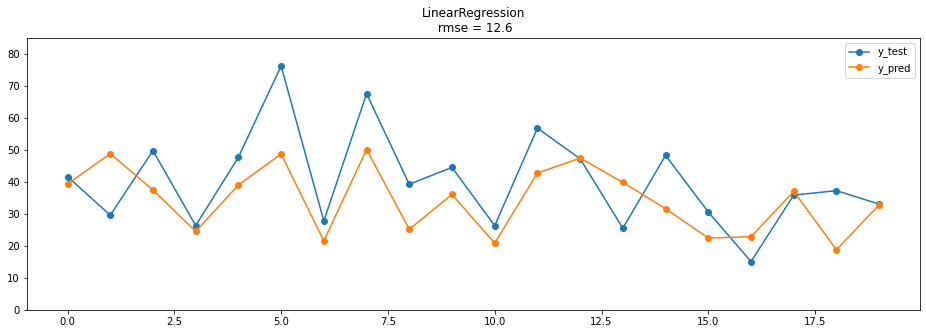

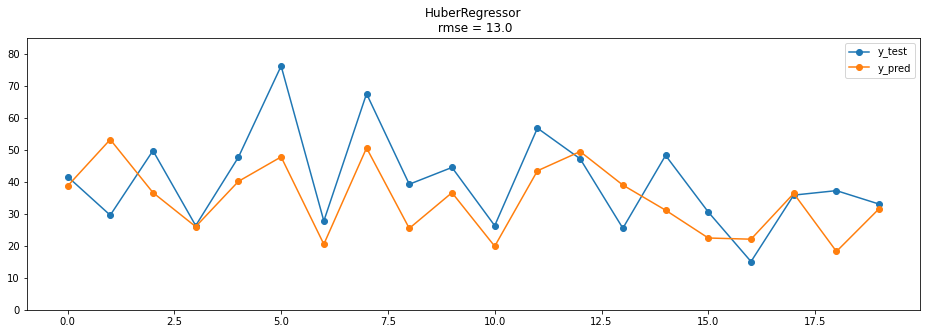

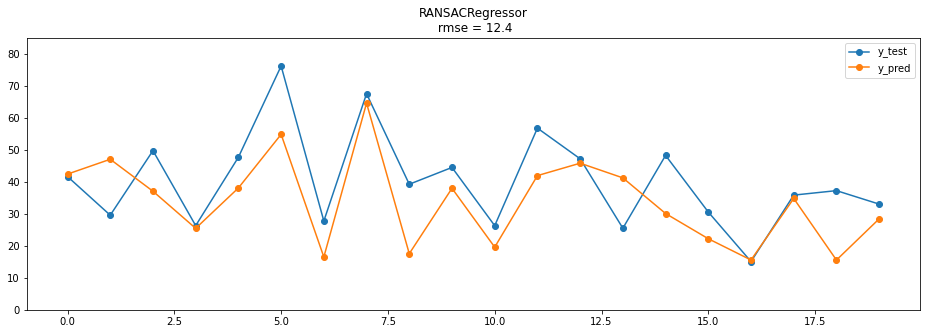

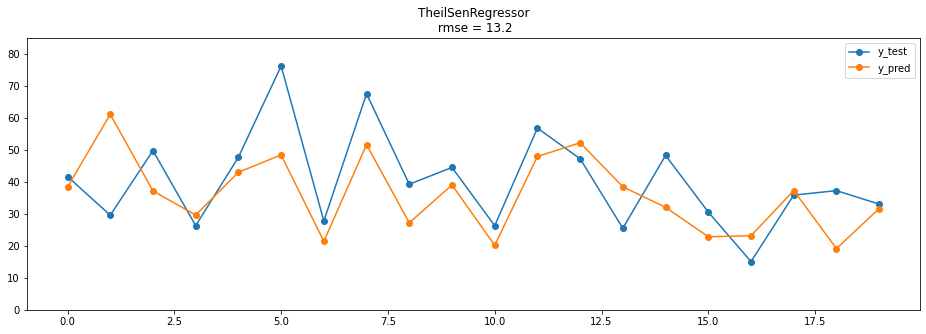


RMSE ...


,regressor,rmse
1,LinearRegression,12.56
5,HuberRegressor,13.00
7,RANSACRegressor,12.40
8,TheilSenRegressor,13.18


In [68]:
n=[]
a=[]

for reg in (  Linear_reg
            , Hubert_reg
            , RANSACR_reg
            , TheilSen_reg
            ):
    
    # fitting 
    reg.fit( x_train_scaled, y_train )
    
    # Finding RMSE
    y_pred = reg.predict( x_test_scaled ) 
    dSq = ( y_test - y_pred )**2
    rmse = ( sum(dSq)/len(dSq) )**0.5 
    n.append( reg.__class__.__name__ )
    a.append( rmse )  
    
    # Visualizing  by  Plotting y_test vs y_pred 
    x_ax = range( len(y_test) )
    fig, ax = plt.subplots(figsize=(16,5))     #figsize=(8,8)
    ax.plot( x_ax , y_test, ls='-', marker='o' ) 
    ax.plot( x_ax , y_pred, ls='-', marker='o' ) 
    ax.set_title( reg.__class__.__name__  + '\n rmse = ' +  np.str( np.round(rmse,1) ))
    ax.legend(['y_test','y_pred'])  
    plt.ylim([0,85])
    #plt.savefig(( np.str( np.round(rmse,3)) + '.png'), dpi=120) 
    plt.show()
    
# RMSE
print('\nRMSE ...')
RMSE=df_clean.iloc[:,[0,0]].head(4)
RMSE.iloc[:,0] = n
RMSE.iloc[:,1] = np.round(a,2)
RMSE.columns = ['regressor', 'rmse']
RMSE

In [69]:
# nonlinear regressor "RANSACRegressor" estimates the best

In [70]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
#                                                         #
#               Preparing to make predictions             #
#                                                         #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [71]:
print('\n Acceptable Range ... \n')

# Range of scalar_columns
Range = pd.concat([df_clean[scalar_columns].min(),df_clean[scalar_columns].max()],axis=1)
Range.columns = ['Min','Max']
print( np.round( Range, 2 ), '\n' )

# Range of categorical_columns
for col in categorical_columns:
    items = sorted( df_clean[ col ].unique() )
    print( col, '   ', items )


 Acceptable Range ... 

              Min     Max
Cement     102.00   540.0
BFS          0.00   316.1
FlyAsh       0.00   200.1
Water      127.00   237.0
SP           0.00    22.1
CoarseAgg  801.00  1145.0
FineAgg    594.00   945.0
Age          1.00   180.0
Strength     2.33    79.3 



In [72]:
x.columns

Index(['Cement', 'BFS', 'Water', 'SP', 'CoarseAgg', 'FineAgg', 'Age'], dtype='object')

In [73]:
# input data for Bridge to predict its MATERIAL

# Item                          Range
Cement         = 350     #  102.00   540.00
BFS            = 0       #    0.00   316.10 
#FlyAsh        = xxx     #    negligible r
Water          = 186     #  121.75   228.00
SP             = 0       #    0.00    22.10
CoarseAgg      = 1050    #  801.00  1145.00
FineAgg        = 770     #  594.00   945.00
Age            = 28      #    1.00   180.00 
#Strength      = xxx     # predicted feature
 

# s  written in the same order as  x
s = [ Cement, BFS, Water, SP, CoarseAgg, FineAgg, Age ]
# define a function called predicted_class
# which returns a string of the predicted class
def Estimator( s, x, encode_columns ):
    s  = pd.DataFrame( [s.copy(),s.copy()], columns=x.columns )
    sx = pd.concat( [s,x], axis=0 )
    sx_encoded = pd.get_dummies(
          sx
        , columns = encode_columns
        )
    sx_scaled = scale( sx_encoded )
    
    #Estimation = Linear_regpredict( sx_scaled )[0]
    #Estimation = Hubert_reg.predict( sx_scaled )[0] 
    #Estimation = RANSACR_reg.predict( sx_scaled )[0]
    Estimation = TheilSen_reg.predict( sx_scaled )[0] 
    
    return Estimation    

pred = Estimator( s, x, encode_columns )
print('The', estimated_column, 'is', round(pred,1) ) 

The Strength is 30.2
